### K-최근접 이웃의 한계

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/Fish.csv')

In [5]:
cond = df['Species'] == 'Perch'

perch_length = df.loc[cond, ['Length2']]
perch_weight = df.loc[cond, ['Weight']]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [8]:
test_input.head()

,Length2
126,43.5
88,22.0
72,8.4
120,40.0
105,27.5


### 선형 회귀

In [9]:
# 선형 회귀 알고리즘 구현된 코드
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(train_input, train_target)

LinearRegression()

In [12]:
lr.score(test_input, test_target)

0.8319722315761022

In [13]:
lr.predict([[60]])

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1636.80262248]])

In [14]:
# 기울기
a = lr.coef_[0][0]
# 37.76616202

In [15]:
# y절편
b = lr.intercept_[0]
# -670.47910704

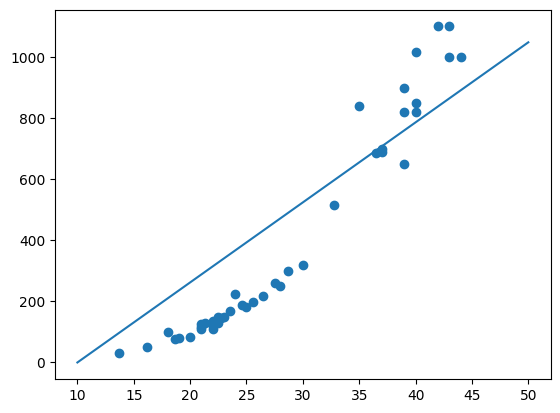

In [16]:
# 그래프로 확인
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_target['Weight'])
plt.plot([10, 50], [0, 45*a+b])
plt.show()

### 다항회귀

In [17]:
perch_length.head()

,Length2
72,8.4
73,13.7
74,15.0
75,16.2
76,17.4


In [18]:
# 물고기 데이터의 제곱항 만들어주기
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] **2
train_input.head()

,Length2,Length2_poly
114,37.0,1369.00
119,40.0,1600.00
125,43.0,1849.00
108,30.0,900.00
85,21.3,453.69


In [19]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [20]:
lr.coef_

array([[-24.26027587,   1.05471762]])

In [21]:
lr.intercept_

array([156.26134921])

In [23]:
# 60cm 짜리 농어에 대한 예측값
lr.predict([[60, 60**2]])

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2497.6282459]])

In [50]:
lr.score(test_input, test_target)

0.9888203638857856

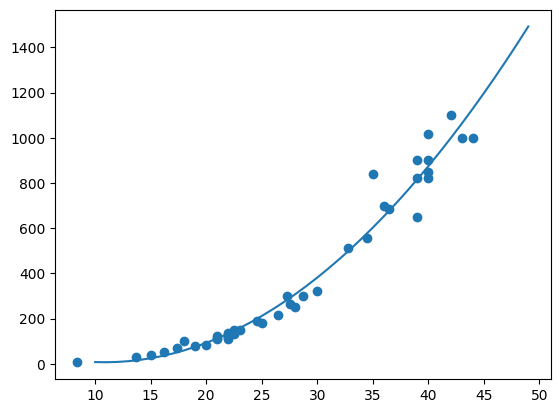

In [57]:
import matplotlib.pyplot as plt
import numpy as np
point = np.arange(10, 50)
plt.scatter(train_input['Length2'], train_target['Weight'])
plt.plot(point, 1.01957346*point**2 + -22.09046554*point + 126.59012923)
plt.show()